<a href="https://colab.research.google.com/github/Chang365/ESAA-25-1-assignments/blob/main/ESAA_25_2_1110_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <딥러닝 파이토치 교과서> 4장 p.138-163

# 4. 딥러닝 시작
## 4.1 인공 신경망의 한계와 딥러닝 출현

- 퍼셉트론: 신경망(딥러닝)의 기원이 되는 알고리즘

- 다수의 신호(흐름이 있는)를 입력으로 받아 하나의 신호를 출력하는데，이 신호를 입
력으로 받아‘흐른다/안 흐른다(1 또는 0) 는 정보를 앞으로 전달하는 원리로 작동

### AND 게이트

- AND 게이트는 모든 입력이 1일 때 작동

### OR 게이트

- OR 게이트는 입력에서 둘 중 하나만1이거나 둘 다 1일 때 작동

### XOR 게이트

- 배타적 논리합이라는 용어로 입력 두 개 중 한 개만 1일 때 작동

## 4.2 딥러닝 구조

### 4.2.1 딥러닝 용어

#### 가중치

- 가중치는 입력 값이 연산 결과에 미치는 영향력을 조절하는 요소

#### 가중합 또는 전달 함수

- 각 노드에서 들어오는 신호에 가중치를 곱해서 다음 노드로 전
달되는데，이 값들을 모두 더한 합계를 가중합이라고 함

#### 활성화 함수

- 전달 함수에서 전달받은 값을 출력
할 때 일정 기준에 따라 출력 값을 변화시키는 비선형 함수

- 시그모이드, 하이퍼볼릭 탄젠트, 렐루 함수

##### 시그모이드 함구

- 선형 함수의 결괴를 0~1 사이에서 비선형 형태로 변형

- 기울기 소멸 문제가 발생하여 딥러닝 모델에서는 잘 사용하지 않음

##### 하이퍼볼릭 탄젠트 함수

- 선형 함수의 결과를 -1~1 사이에서 비선형 형태로 변형
- 기울기 소멸 문제 해결 해결

##### 렐루 함수

- 입력이 음수일 때는 0을 출력하고 양수 일땐 입력 출력

- 경사하강법에 영향을 주지 않아 학습 속도가 빠르고 기울기 소멸 문제가 발생하지 않음

##### 리키 렐루 함수

- 입력값이 음수이면 0이 아닌 0.001 처럼 매우 작은 수를 반환


##### 소프트맥스 함수

- 입력값을 0~1 사이에 출력되도록 정규화하여 출력 값들의 총합이 항상 1이 되도록 함

#### 손실함수

- 경사 하강법은 학습률과 손실 함수의 순간 기울기를 이용하여 가중치를 업데
이트하는 방법

##### 평균 제곱 오차

- 실제 값과 예측 값의 차이를 제곱하여 평균을 낸 것

##### 크로스 엔트로피 오차

- 분류 문제에서 원-핫 인코딩했을때 사용할 수 있는 오차 계산법







## 4.2.2 딥러닝 학습
- 순전파와 역전파로 나뉨

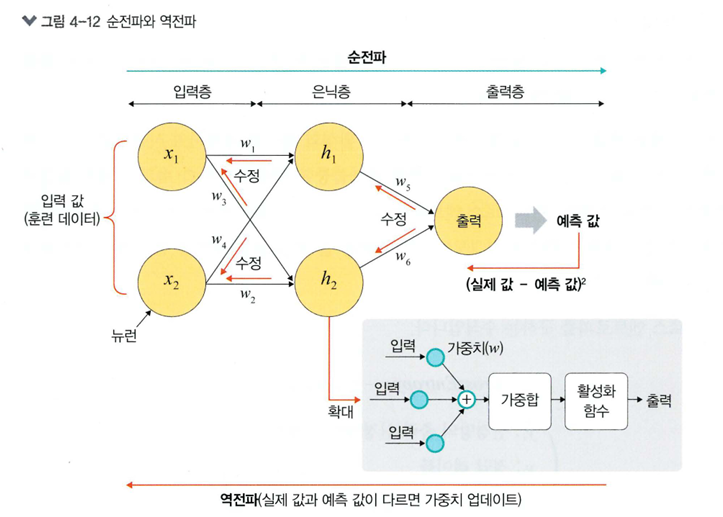



In [2]:
import torch
import torch.nn as nn

class Net(torch.nn.Module):
  def __init__(self, n_feature, n_hidden, n_output):
    super(Net, self).__init__()
    self.hidden = torch.nn.Linear(n_feature, n_hidden)
    self.relu = torch.nn.ReLu(inplace = True)
    self.out = torch.nn.Linear(n_hidden, n_output)
    self.softmax = torch.nn.Softmax(dim = n_output)
  def forward(self, x):
    x = self.hidden(x)
    x = self.relu(x)
    x = self.out(x)
    x = self.softmax(x)
    return x

In [ ]:
# loss_fn = torch.nn.MSELoss(reduction='sum')
# y_pred = model(x)
# loss = loss_fn(y_pred, y)

In [ ]:
# loss = nn.CrossEntropyLoss()
# input = torch.randn(5, 6, requires_grad=True)
# target = torch.empty(3, dtype=torch.long).random_(5)
# output = loss(input, target)
# output.backward()

In [ ]:
# class DropoutModel(torch.nn.Module):
#   def __init__(self):
#     super(DropoutModel, self).__init__()
#     self.layer1 = torch.nn.Linear(784, 1200)
#     self.dropout1 = torch.nn.Dropout(0.5)
#     self.layer2 = torch.nn.Linear(1200, 1200)
#     self.dropout2 = torch.nn.Dropout(0.5)
#     self.layer3 = torch.nn.Linear(1200, 10)

#   def forward(self, x):
#     x = F.relu(self.layer1(x))
#     x = self.dropout1(x)
#     x = F.relu(self.layer2(x))
#     x = self.dropout2(x)
#     return self.layer3(x)

### 4.2.3 딥러닝의 문제점과 해결바안

- 활성화 함수가 적용된 여러 은닉층을 결합하여 비선형 영역을 표현하는 것
- 은닉층 개수가 많을수록 데이터 분류가 잘되지만 세 가지 문제점

1. 과적합 문제


In [3]:
class DropoutModel(torch.nn.Module):
  def __init__(self):
    super(DropoutModel, self).__init__()
    self.layer1 = torch.nn.Linear(784, 1200)
    self.dropout1 = torch.nn.Dropout(0.5) # 50%의 노드를 무작위로 선택하여 사용하지 않겠다는 의미
    self.layer2 = torch.nn.Linear(1200, 1200)
    self.dropout2 = torch.nn.Dropout(0.5)
    self.layer3 = torch.nn.Linear(1200, 10)

  def forward(self, x):
    x = F.relu(self.layer1(x))
    x = self.dropout1(x)
    x = F.relu(self.layer2(x))
    x = self.dropout2(x)
    return self.layer3(x)

2. 기울기 소멸 문제 발생

- 은닉층이 많은 신경망에서 주로 발생. 출력층에서 은닉층으로 전달되는 오차가 크게 줄어들어 학습이 되지 않는 현상.
- 해결 방법: 렐루 활성화 함수 사용

3. 성능이 나빠지는 문제 발생

- 경사 하강법은 손실 함수의 비용이 최소가 되는 지점을 찾을 때까지 기울기가 낮은 쪽으로 계속 이동시키는 과정 반복하는데, 이때 성능이 나빠지는 문제 발생
- 해결 방법: 확률적 경사 하강법, 미니 배치 경사 하강법 사용


<배치 경사 하강법>

-  전체 데이터셋에 대한 오류를 구한 후 기울기를 한 번만 계산하여 모델의 파라미터를 업데이트하는 방법

<확률적 경사 하강법>

- 임의로 선택한 데이터에 대해 기울기를 계산하는 방법으로 적은 데이터를 사용하므로 빠른 계산이 가능

<미니 배치 경사하강법>

- 전체 데이터셋을 미니 배치 여러
개로 나누고 미니 배치 한 개마다 기울기를 구한 후 그것의 평균 기울기를 이용하여 모델을 업데
이트해서 학습하는 방법

In [ ]:
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
  self.x_data = [[1,2,3], [4,5,6], [7,8,9]]
  self.y_data = [[12],[18],[11]]

  def __len__(self):
    return len(self.x_data)

  def __getitem__(self, idx):
    x = torch.FloatTensor(self.x_data[idx])
    y = torch.FloatTensor(self.y_data[idx])
    return x, y

dataset = CustomDataset()
dataloader = DataLoader(
    dataset,
    batch_size = 2,
    shuffle = True
)

### 4.2.4 딥러닝을 사용할 때 이점

- 특성 추출: 데이터별로 어떤 특징을 갖고 있는지 찾아내고, 그것을 토대로 데이터를 벡터로 변환하는 작업. 머신러닝 알고리즘은 복잡하며 수집된 데이터에 대한 전문 지식이 필요.

- 빅데이터의 효율적 활용

## 4.3 딥러닝 알고리즘

### 4.3.1 심층 신경망(DNN)

- 입력층과 출력층 사이에 다수의 은닉층을 포함하는 인공 신경망. 별도의 트릭 없이 비선형 분류가 가능함. 비선형적 관계를 학습할 수 있는 장점이 있지만, 학습을 위한 연산량이 많고 기울기 소멸 문제 등이 발생. 이를 위해 드롭아웃, 렐루 함수, 배치 정규화 적용.

### 4.3.2 합성곱 신경망(CNN, Convolution Neural Network)

- 합성곱층과 풀링층을 포함하는 이미지 처리 성능이 좋은 인공 신경망 알고리즘.

### 4.3.3 순환 신경망(Recurrent Neural Network)

- 시계열 데이터 같은 시간 흐름에 따라 변화하는 데이터를 학습하기 위한 인공 신경망. '순환'은 자기 자신을 참조한다는 것으로, 현재 결과가 이전 결과와 연관이 있다는 의미다.

### 4.3.4 제한된 볼츠만 머신

- 볼츠만 머신은 가시층과 은닉층으로 구성된 모델. 이 모델에서 가시층은 은닉층과만 연결되는데 이것이 제한된 볼츠만 머신.

### 4.3.5 심층 신뢰 신경망

- 입력층과 은닉층으로 구성된 제한된 볼츠만 머신을 블록처럼 여러 층으로 쌓은 형태로 연결된 신경망. 즉, 사전 훈련된 제한된 볼츠만 머신을 층층이 쌓아 올린 구조로, 레이블이 없는 데이터에 대한 비지도 학습.


